# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [1]:
#import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import copy

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

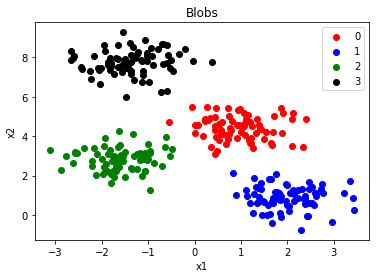

In [2]:
# 3 points

#make the dataset with make_blobs use random state 0 use 300 samples
#And plot it

def separate_labels(labels, points):
    data = [[],[],[],[]]
    for id,l in enumerate(labels):
        data[l].append(list(points[id]))
    return np.array(data[0]), np.array(data[1]), np.array(data[2]), np.array(data[3])

def make_plot(data_0,data_1,data_2,data_3,title='Blobs'):
    plt.scatter(x=data_0[:,0],y=data_0[:,1],color='r',label='0')
    plt.scatter(x=data_1[:,0],y=data_1[:,1],color='b',label='1')
    plt.scatter(x=data_2[:,0],y=data_2[:,1],color='g',label='2')
    plt.scatter(x=data_3[:,0],y=data_3[:,1],color='k',label='3')
    plt.legend()
    plt.xlabel('x1');
    plt.ylabel('x2');
    plt.title(title);


blobs_data = make_blobs(random_state=0,n_samples=300,centers=4,cluster_std=0.6)
X = blobs_data[0]
Y = blobs_data[1]

data_0, data_1, data_2, data_3 = separate_labels(Y, X)
make_plot(data_0,data_1,data_2,data_3)


In [3]:
# def create_df():
#     data_values = np.concatenate((blobs_data[0], np.array([list(blobs_data[1])]).T),axis=1)
#     data = pd.DataFrame(data_values,columns=['x1','x2','y'])
#     data.y = data.y.apply(lambda x: int(x))
#     return data
    
# df_iris = create_df()
# print(df_iris.shape)

In [4]:
assert X.shape== (300,2)
assert Y.shape== (300,)

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```, it should give the same result as the previous 2 combined.
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [5]:
# 3 points
def square_diff(v1, v2):
    return (v1-v2)**2

In [6]:

assert square_diff(X[0],X[1]).shape==(2,) 


assert square_diff(X[0],X[0])[0]== 0
assert square_diff(X[0],X[0])[1]== 0 

assert abs(square_diff(X[0],X[1])[0] - 5.06) < 0.05
assert abs(square_diff(X[0],X[1])[1]-  27.80) < 0.05


assert abs(square_diff(X[0],X[100])[0] - 2.03) < 0.05
assert abs(square_diff(X[0],X[100])[1]-  41.96) < 0.05



assert abs(square_diff(X[200],X[256])[0]- 3.30 ) < 0.05
assert abs(square_diff(X[200],X[256])[1]- 0.09 ) < 0.05

In [7]:
# 2 points
def root_sum_squared(v1):
    return np.sqrt(sum(v1))

In [8]:
v1 = root_sum_squared(square_diff(X[0],X[0]))
v2 = root_sum_squared(square_diff(X[0],X[1]))
v3 = root_sum_squared(square_diff(X[0],X[100]))
v4 = root_sum_squared(square_diff(X[200],X[256]))


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [9]:
def euclidean_distances(x1,x2):
    return np.linalg.norm(x1 - x2)

In [10]:
v1 = euclidean_distances(X[0],X[0])
v2 = euclidean_distances(X[0],X[1])
v3 = euclidean_distances(X[0],X[100])
v4 = euclidean_distances(X[200],X[256])


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [11]:
# 3 points
def evaluate(y, y_p):
    return sum(y == y_p) / len(y)

In [12]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([1,2,2])
d = np.array([2,2,2])

assert evaluate(a,b) == 1
assert 0.66 <= evaluate(a,c) <= 0.667
assert 0.33 <= evaluate(a,d) <= 0.34

### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [13]:
# 10 points
#Implement the KNN function that predicts the class for the test values using the train values

#OUTPUT MUST BE A NP ARRAY

def predict_one(x_test, x_true, y_true, k):
    dist = []
    for id,y in enumerate(y_true):
        dist.append([y,euclidean_distances(x_true[id],x_test)])
    y_items = np.array(sorted(dist, key=lambda x: x[-1])[:k])[:,0]
    y_items = list(y_items)
    return max(set(y_items), key=y_items.count)

def predict(x_test, x_true, y_true, k= 5):
    y_pred = []
    for x in x_test:
        y = predict_one(x, x_true, y_true, k)
        y_pred.append(y)
    return np.array([int(i) for i in y_pred])


In [14]:
#1 point
from sklearn.model_selection import train_test_split
#tested with random state 0
#create the train test split test_size 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2,stratify=Y,random_state=0)

In [15]:
assert x_train.shape == (240,2)
assert x_test.shape == (60,2)
assert y_train.shape == (240,)
assert y_test.shape == (60,)

In [16]:
predictions = predict(x_test,x_train, y_train, k=3)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


In [17]:
# Extra point
predictions = predict(x_test,x_train, y_train, k=2)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


In [18]:
print('Accuracy {:0.2f}%'.format( evaluate(predictions, y_test)*100 ))

Accuracy 100.00%


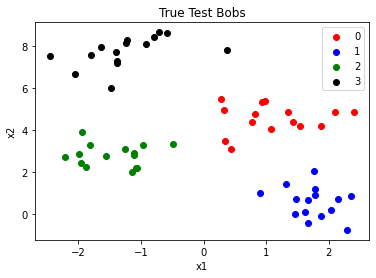

In [19]:
t_data_0, t_data_1, t_data_2, t_data_3 = separate_labels(predictions, x_test)
make_plot(t_data_0, t_data_1, t_data_2, t_data_3,'True Test Bobs')

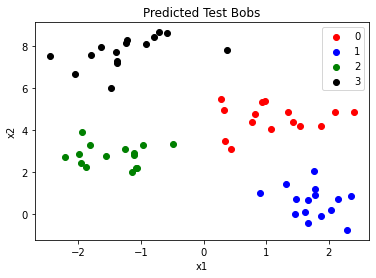

In [20]:
p_data_0, p_data_1, p_data_2, p_data_3 = separate_labels(y_test, x_test)
make_plot(p_data_0,p_data_1,p_data_2,p_data_3,'Predicted Test Bobs')